In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *
from fastai import *

##### We build a simple Donkey VS Horses classifier here with a pretrained resnet18 network to see how it compares to the same classifier when a channel is ignored at random during training. The objective is to test a hypothesis that a similar technique will work for the Human Protein Atlas (HPA) dataset on Kaggle

The motivation for trying this out is the fact that the HPA Dataset on Kaggle has samples with 4 channels each. On talking to some Cell Biology professors in my university, I realized that most biologists have equipment to get imagery of only 3 channels. Hence, a model trained on this dataset might prove unuseful to the people who actually need it. <br>
By training a model with a random channel ignored for each sample, I predict that the model may learn to work with less information and and still get good, if not the best accuracy which would still be infinitely better than an unusable model

In [4]:
ls

SimpleClassifier.ipynb  donkeys.csv             horses.csv
data/                   download_data.ipynb


In [5]:
PATH = Path('data')

In [16]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=224, valid_pct=0.2, bs=8)

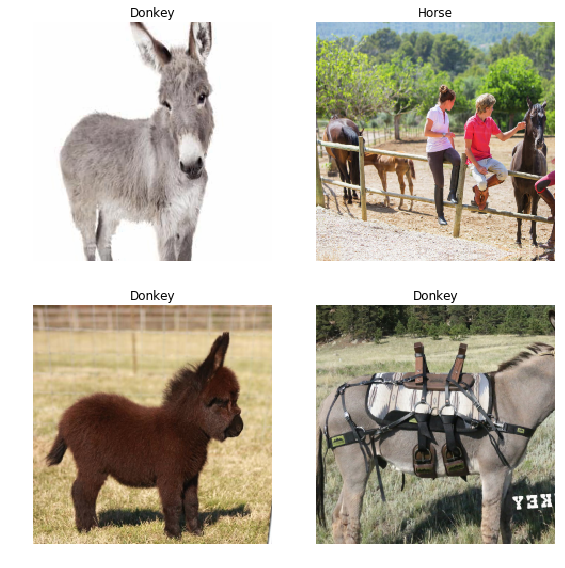

In [18]:
data.show_batch(rows=2)

In [32]:
# A resnet18 is used here so that we can quickly test our hypothesis.
# Also, this is because I'm currently working on my MacBook with no GPU
arch = models.resnet18
learn = create_cnn(data, arch, metrics=[accuracy])

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


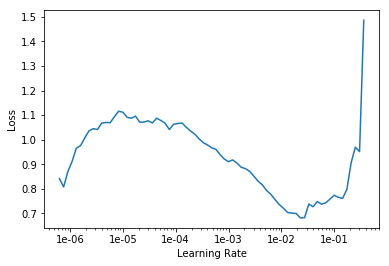

In [23]:
learn.recorder.plot()

The optimal learning rate seems to be around `3e-3`

In [33]:
learn.fit_one_cycle(4, 3e-3)

epoch,train_loss,valid_loss,accuracy
1,0.581053,0.204032,0.931818
2,0.401243,0.357112,0.897727
3,0.341199,0.114501,0.965909
4,0.285881,0.115088,0.954545


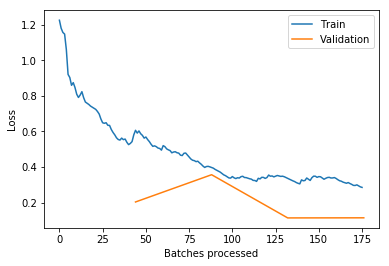

In [34]:
learn.recorder.plot_losses()

In [35]:
learn.fit_one_cycle(2, 7e-4)

epoch,train_loss,valid_loss,accuracy
1,0.170758,0.141893,0.954545
2,0.224790,0.119334,0.965909


In [36]:
learn.save('frozen_resnet18_5_epochs')

As we can see, the model is easily able to get upto `96% accuracy` on classifying donkeys from horses (coz why not) although the model is still frozen except for the last layer. It is now time to compare this to the model where a channel is randomly ignored for each sample